In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import spacy
import gensim

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('resume.csv')
df = df.dropna(subset=['Resume_str'])

In [3]:
data = df.Resume_str.values.tolist()
data = [re.sub(r'\s+', ' ', sent) for sent in data]
data = [re.sub(r"\'", "", sent) for sent in data]
data = [re.sub('\w*\d\w*', ' ', sent) for sent in data]

In [4]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data_words = list(sent_to_words(data))

In [5]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [6]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'VERB'])

In [7]:
vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [8]:
no_topics = 20
nmf_model = NMF(n_components=no_topics).fit(data_vectorized)

In [9]:
topics_dict = {}
for topic_idx, topic in enumerate(nmf_model.components_):
    topics_dict["Topic"+str(topic_idx)] = [vectorizer.get_feature_names()[i] for i in topic.argsort()[:-10 - 1:-1]]

In [10]:
topics_to_df = pd.DataFrame(topics_dict).T
topics_to_df

,0,1,2,3,4,5,6,7,8,9
Topic0,equipment,maintenance,repair,safety,perform,aviation,personnel,aircraft,material,control
Topic1,food,kitchen,chef,menu,cost,preparation,quality,item,restaurant,cook
Topic2,account,accounting,prepare,tax,reconciliation,statement,bank,payroll,cash,payment
Topic3,marketing,market,strategy,brand,campaign,budget,advertising,content,website,event
Topic4,student,teacher,school,art,classroom,lesson,parent,child,teach,grade
Topic5,engineering,quality,production,control,manufacturing,cost,engineer,improvement,inventory,material
Topic6,construction,site,schedule,building,safety,budget,contractor,material,completion,build
Topic7,employee,resource,benefit,policy,hire,payroll,performance,interview,recruitment,conduct
Topic8,design,designer,art,concept,material,engineering,software,drawing,engineer,web
Topic9,analysis,finance,budget,cost,reporting,forecast,accounting,planning,analyze,risk


In [11]:
topics = ['Warehouse','Chef','Accounting',
          'Marketing','Teacher','Engineering',
          'Construction','HR','Engineering','Finance',
          'Healthcare','Sales','Database','Bartender','ProductControl',
          'Politics','Fitness','Aviation',
          'IT','Arts']

topics_to_df["Topics"] = topics
topics_to_df

,0,1,2,3,4,5,6,7,8,9,Topics
Topic0,equipment,maintenance,repair,safety,perform,aviation,personnel,aircraft,material,control,Warehouse
Topic1,food,kitchen,chef,menu,cost,preparation,quality,item,restaurant,cook,Chef
Topic2,account,accounting,prepare,tax,reconciliation,statement,bank,payroll,cash,payment,Accounting
Topic3,marketing,market,strategy,brand,campaign,budget,advertising,content,website,event,Marketing
Topic4,student,teacher,school,art,classroom,lesson,parent,child,teach,grade,Teacher
Topic5,engineering,quality,production,control,manufacturing,cost,engineer,improvement,inventory,material,Engineering
Topic6,construction,site,schedule,building,safety,budget,contractor,material,completion,build,Construction
Topic7,employee,resource,benefit,policy,hire,payroll,performance,interview,recruitment,conduct,HR
Topic8,design,designer,art,concept,material,engineering,software,drawing,engineer,web,Engineering
Topic9,analysis,finance,budget,cost,reporting,forecast,accounting,planning,analyze,risk,Finance


In [12]:
topics_matrix = nmf_model.transform(data_vectorized)
topics_matrix_std = StandardScaler().fit_transform(topics_matrix)

In [13]:
threshold = 0.02
_idx = np.amax(topics_matrix, axis=1) > threshold
topics_matrix_filtered = topics_matrix[_idx]

topics_matrix_std = StandardScaler().fit_transform(topics_matrix_filtered)

In [14]:
tsne = TSNE(n_components=2, verbose=1, random_state=20, init='pca')
topics_mapped_2d = tsne.fit_transform(topics_matrix_std)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2483 samples in 0.009s...
[t-SNE] Computed neighbors for 2483 samples in 0.192s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2483
[t-SNE] Computed conditional probabilities for sample 2000 / 2483
[t-SNE] Computed conditional probabilities for sample 2483 / 2483
[t-SNE] Mean sigma: 0.796577
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.032860
[t-SNE] KL divergence after 1000 iterations: 1.041241


In [15]:
max_topic_per_post = []
for i in range(topics_matrix_filtered.shape[0]):
    max_topic_per_post += topics_matrix_filtered[i].argmax(),

max_topic_per_post_df = []
for i in range(topics_matrix.shape[0]):
    max_topic_per_post_df += topics_matrix[i].argmax(),
    
max_topic_per_post = [[x] for x in max_topic_per_post]
tsne_data = np.concatenate((topics_mapped_2d, max_topic_per_post), 1)

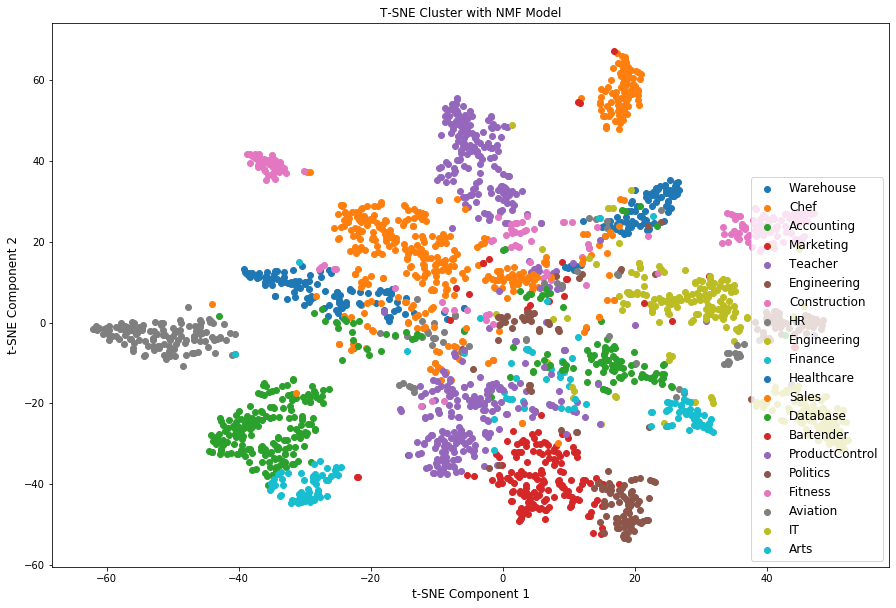

In [16]:
label_list = list(range(20))

plt.figure(figsize=(15, 10))
for idx in range(len(topics_to_df.Topics)):
    inds = np.where(tsne_data[:, 2] == idx)[0]
    plt.scatter(x=tsne_data[inds, 0],
                y=tsne_data[inds, 1],
                marker='o',
                label=topics_to_df.Topics[idx])

plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.title('T-SNE Cluster with NMF Model')
lgnd = plt.legend(loc="lower right", fontsize=12)

In [17]:
df['topic'] = max_topic_per_post_df

In [18]:
topic_bar = df.topic.value_counts().reset_index().rename(columns={'index':'Topic', 'topic':'Count'}).sort_values('Count', ascending=False)

In [19]:
topic_bar.Topic=topic_bar.Topic.apply(lambda x: topics[x])

Text(0.5, 1.0, 'Topic Model with NMF')

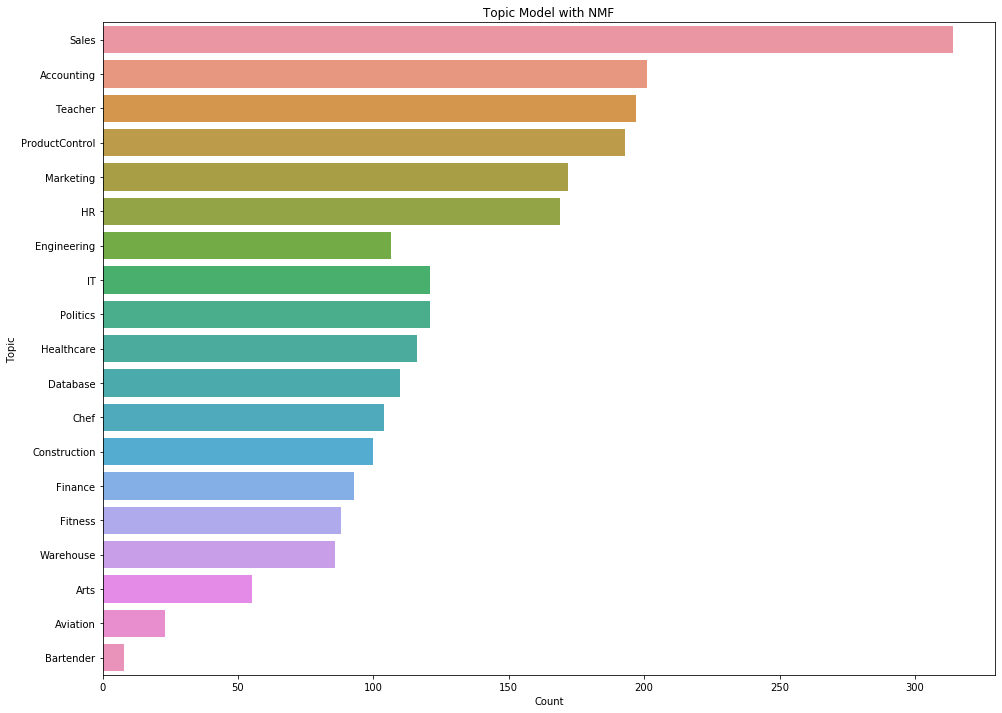

In [20]:
plt.figure(figsize=(16,12))
barchart = sns.barplot(data=topic_bar, x='Count', y='Topic', ci=None)
barchart.set_xlabel('Count')
barchart.set_ylabel('Topic')
barchart.set_title("Topic Model with NMF")